In [2]:
from verispy import VERIS
import pandas as pd
import matplotlib.pyplot as plt
data_dir="validated"
v = VERIS(json_dir=data_dir)
print (v.schema_url)

Found 8543 json files.
https://raw.githubusercontent.com/vz-risk/veris/master/verisc-merged.json


In [3]:
veris_df = v.json_to_df(verbose=True)

Loading schema
Loading JSON files to DataFrame.


100%|██████████| 8543/8543 [00:07<00:00, 1162.87it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


  5%|▌         | 9/173 [00:00<00:03, 43.88it/s]/opt/anaconda3/lib/python3.9/site-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
  8%|▊         | 14/173 [00:04<00:56,  2.82it/s]/opt/anaconda3/lib/python3.9/site-packages/verispy/veris.py:190: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: enum_checker(x, item))
 12%|█▏        | 20/173 [00:05<00:38,  4.01it

Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


# Start of Data Analysis

### Get number of incidents where victim company has over 1000 employees

In [16]:
large_filter = veris_df["victim.employee_count.Large"] == True
large_df = veris_df[large_filter]
print(len(large_df))

269


### Plot graph of number of incidents per year over the 2 decades for large companies

<AxesSubplot:title={'center':'Number of incidents over two decades for large companies'}, xlabel='Year', ylabel='Number of incidents'>

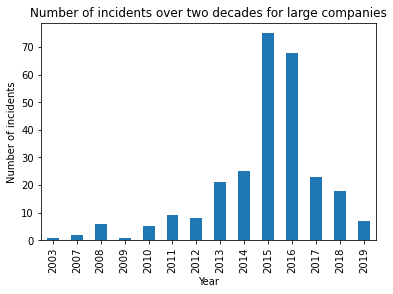

In [50]:
large_df_sortedtime = large_df.sort_values('timeline.incident.year', ascending=False)
sorted_incident_num = large_df_sortedtime['timeline.incident.year'].value_counts().sort_index()
sorted_incident_num.plot(kind="bar", title="Number of incidents over two decades for large companies",
                         xlabel="Year", ylabel="Number of incidents")